In [62]:
from os import listdir
import numpy as np
import cv2
from matplotlib import image
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C:/Users/admin/Desktop/midvi s3/Image mining/obj_decoys'
for filename in listdir(path):
	# load image
	img_data = image.imread(path+'/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	# Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
  # print(' %s %s ' % (filename, img_data.shape))

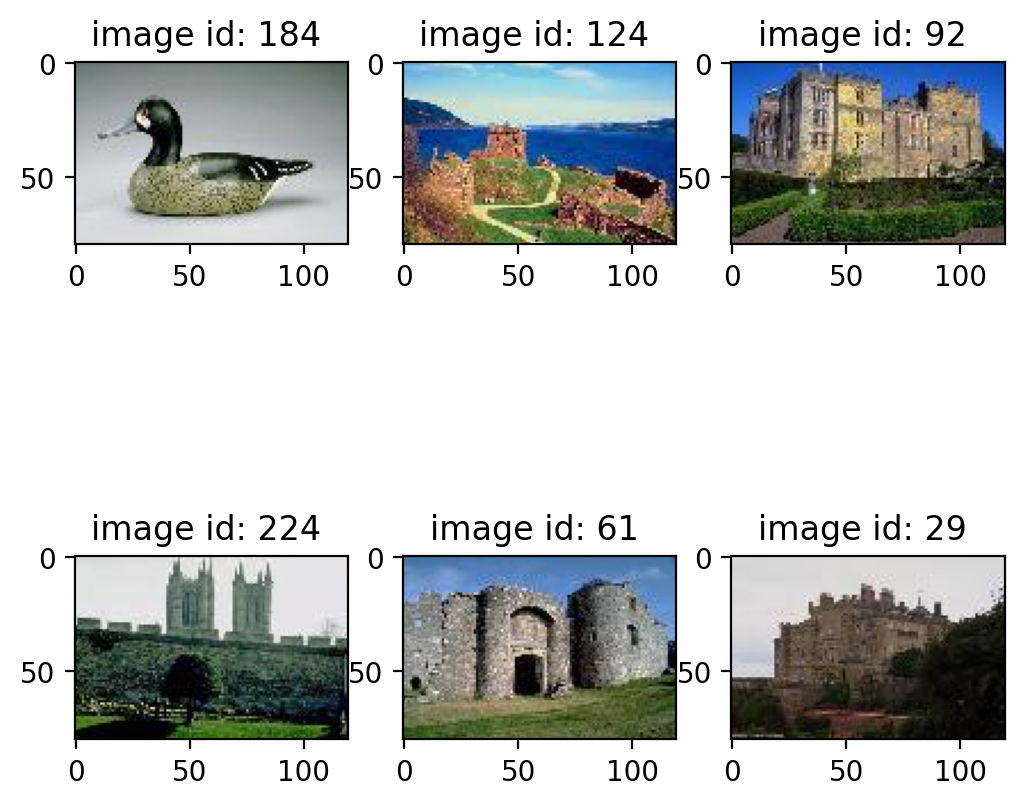

In [63]:
# Afficher les 6 premières images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(270), 6)
for i in range(6):
  ax1 = fig.add_subplot(2, 3, i+1)
  ax1.imshow(loaded_images[id[i]])
  ax1.set_title('image id: %s '% (id[i]))

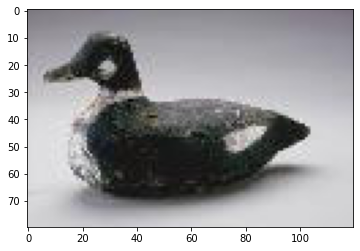

In [66]:
img_requete = image.imread('C:/Users/admin/Desktop/midvi s3/Image mining/img.jpg')
plt.imshow(img_requete)

In [67]:
def CBIR_Indexation():
    features=np.zeros([len(loaded_images),7])
    for i in range (len(loaded_images)):
        loaded_images[i]=loaded_images[i]
        moments = cv2.moments(loaded_images[i].flatten())
        huMoments = cv2.HuMoments(moments).flatten()
        features[i]=huMoments
    return features

In [68]:

moments = cv2.moments(img_requete.flatten())
imreq = cv2.HuMoments(moments).flatten()

In [69]:
imreq

array([  17.84919833,  318.59388088,   69.63795886,   69.63795886,
       4849.4453141 , 1242.9817387 ,    0.        ])

In [70]:
CBIR_Indexation()

array([[1.57302451e+01, 2.47440612e+02, 7.16213107e+02, ...,
        5.12961214e+05, 1.12662077e+04, 0.00000000e+00],
       [1.99641564e+01, 3.98567543e+02, 2.39916412e+02, ...,
        5.75598847e+04, 4.78972878e+03, 0.00000000e+00],
       [2.52180770e+01, 6.35951409e+02, 1.10936026e+03, ...,
        1.23068018e+06, 2.79759325e+04, 0.00000000e+00],
       ...,
       [2.45933072e+01, 6.04830758e+02, 1.63672734e+03, ...,
        2.67887639e+06, 4.02525383e+04, 0.00000000e+00],
       [2.22813008e+01, 4.96456365e+02, 2.22062477e+03, ...,
        4.93117435e+06, 4.94784084e+04, 0.00000000e+00],
       [2.22159992e+01, 4.93550620e+02, 7.89250852e+02, ...,
        6.22916907e+05, 1.75339963e+04, 0.00000000e+00]])

In [71]:

import scipy.spatial.distance as dist

def CBIR_Recherche(Imreq,ind_Matrix):
    distances = {}
    for i in range(len(loaded_images)):
       
        distances[i]=dist.euclidean(Imreq,ind_Matrix[i])
        
        distance=dict(sorted(distances.items(),key=lambda x: x[1]))
    return distance

In [72]:
index_Matrix=CBIR_Indexation()
# Afficher la taille de la matrice de caractéristiques et qui doit étre de taille égale à Nombre d'images dans la base multiplié par nombre de caractéristiques
print (index_Matrix.shape)
print(index_Matrix)

(270, 7)
[[1.57302451e+01 2.47440612e+02 7.16213107e+02 ... 5.12961214e+05
  1.12662077e+04 0.00000000e+00]
 [1.99641564e+01 3.98567543e+02 2.39916412e+02 ... 5.75598847e+04
  4.78972878e+03 0.00000000e+00]
 [2.52180770e+01 6.35951409e+02 1.10936026e+03 ... 1.23068018e+06
  2.79759325e+04 0.00000000e+00]
 ...
 [2.45933072e+01 6.04830758e+02 1.63672734e+03 ... 2.67887639e+06
  4.02525383e+04 0.00000000e+00]
 [2.22813008e+01 4.96456365e+02 2.22062477e+03 ... 4.93117435e+06
  4.94784084e+04 0.00000000e+00]
 [2.22159992e+01 4.93550620e+02 7.89250852e+02 ... 6.22916907e+05
  1.75339963e+04 0.00000000e+00]]


In [73]:


distanes_CBIR=CBIR_Recherche(imreq,index_Matrix)

In [74]:
distanes_CBIR

{162: 0.0,
 196: 343.5890489927577,
 174: 371.3654038417994,
 139: 373.2542160233722,
 199: 515.5779183573342,
 87: 896.5874137989387,
 189: 944.0515661720763,
 84: 977.556057521598,
 184: 1309.2887151566858,
 144: 1596.5207326877621,
 192: 1879.5389405474007,
 138: 2059.5264049478237,
 165: 2237.895781737402,
 38: 2365.2504438977558,
 161: 2371.892986245923,
 214: 2536.843497931996,
 136: 2559.585090182648,
 171: 2571.599566548737,
 237: 2683.345097788384,
 140: 2745.2083622580694,
 211: 2950.07306175374,
 142: 3108.155207467883,
 197: 3221.4175528509345,
 190: 3350.679984504455,
 185: 3426.6322295903583,
 191: 3549.598004093524,
 216: 3574.5037313838516,
 109: 3593.0419171946924,
 147: 3637.492979870765,
 212: 3682.7651412270734,
 193: 3758.649004242906,
 183: 3871.65957237178,
 141: 4056.1302624981167,
 33: 4196.782620169313,
 116: 4213.63711996761,
 217: 4251.229727285487,
 155: 4299.23205682809,
 215: 4342.059103799177,
 236: 4371.775449892439,
 204: 4426.076822608231,
 202: 4444.

In [75]:
result = distanes_CBIR.keys()
  
# Convert object to a list
data = list(result)
  
# Convert list to an array
arraydistance = np.array(data)
  
# print the numpy array
print(arraydistance)

[162 196 174 139 199  87 189  84 184 144 192 138 165  38 161 214 136 171
 237 140 211 142 197 190 185 191 216 109 147 212 193 183 141  33 116 217
 155 215 236 204 202 205 180 207 170 137 160 182 209 229 198 152 206 172
 126 167 175 150 208 210 187 176 168 146 203 151 188 163 166 148 194 226
 157  23 181 149 111 156 178 179 195 169 153  73 242 186 173 232 112 159
 154 119 177 164 213 143 158  48 201 218  16  61 145 108 200   1  74 252
  85 122  54  79   3 238  11 121  72  62  24  90  26  25  50 129  20  69
 113  39 247  63  86 221 123 222  78 107  10 266  44  53  47  65 265  59
  43   0 227  81 103   5 223 110 104 269  17 118 262  12 235  52  49  60
 249  82  45  64 124 125 243 233   2 245  89 102  75 239 130 240 261 228
 219 244 263 254  13  93 260 114  94 267  34   8  51  56  70  58  91 256
  92  67 248 101  22 134 246  18 132   4 241  41  37  31 268  21 259  28
  71 106 220  99  40 120  55  88  42 115 135  77 255  95 257 105 230  80
 131  76  97 234  19 225  83 258  46 100 251  30  6

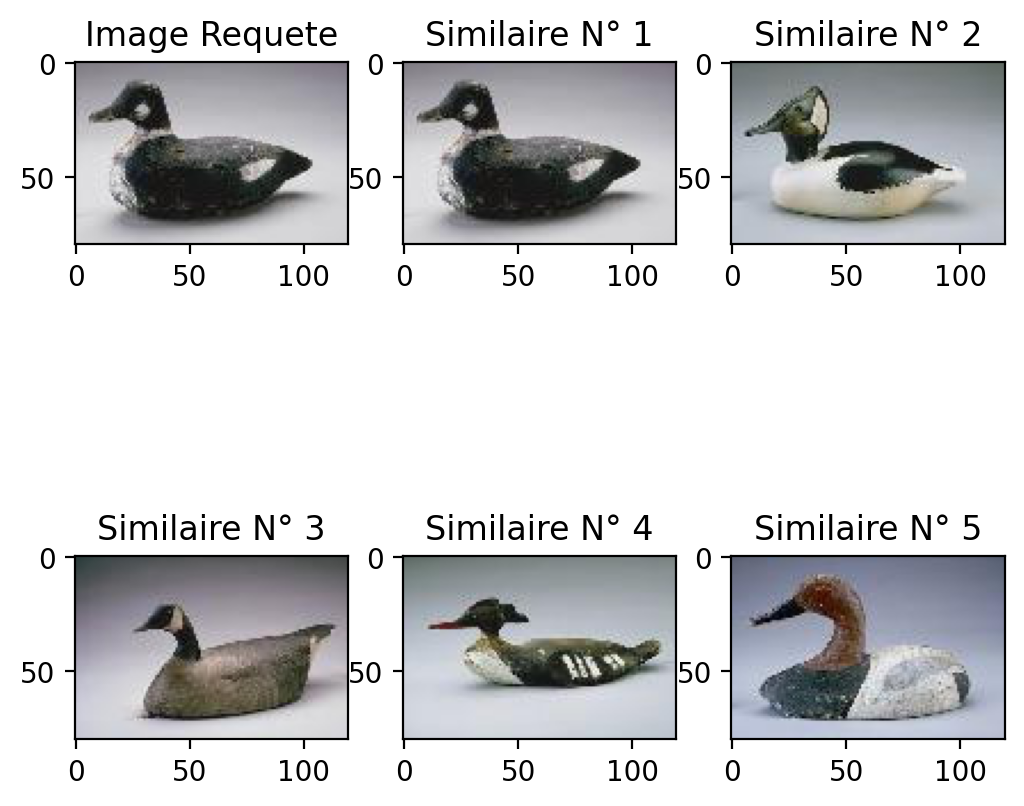

In [76]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    ax1.imshow(loaded_images[arraydistance[i]])
    ax1.set_title('Similaire N° %s' %(i+1))